Import the data in a dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/raw/ResectMap_DATA_2023-11-13_2306.csv")
df_mrn = df[df["mrn"].notna()]

C:\Users\Amaury\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (8,20,31,39,65,79,83,85,127,130,132,150,153,161,308,313,317,321,325,329,330,334,377,385,403,409,439,440,441,442,443,444,445,453,463,475,512,523,524,525,526,527,528,529,537,566,572,574,588,589,590,591,592,601,602,604,605,606,608,620,621,622,627,633,636,637,639,646,647,658,676,677,682,695,698,712,714,718,720,721,723,725,726,728,732,733,735,748,750,754,757,759,761,762,764,768,770,772,774,776,780,782,786,787,791,796,803,810,812,813,814,815,817,818,880,887,888,896,904,905,906,968,975,976,984,992,993,994,1056,1063,1064,1072,1080,1081,1082,1144,1151,1152,1169,1170,1232,1239,1240,1257,1258,1320,1327,1328,1345,1408,1415,1416,1432,1433,1496,1503,1521,1523,1540,1541,1558,1559,1576,1577,1595,1613,1631,1649,1667,1669,1670,1671,1678,1730,1738,1790,1801,1802,1811,1819,1820,1821,1822,1823,1830,1882,1890,1942,1953,1954,1963,1971,1972,1973,1974,1975,1982,2034,2042,2094,2105,2106,211

Plotting the age distribution of the data

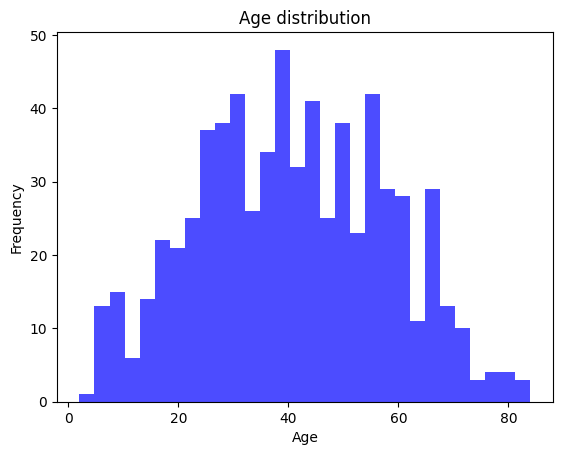

In [2]:
# Create a histogram
plt.hist(df_mrn["age"], bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Show the plot
plt.show()

Showing the sex distribution of the data

1 = female
2 = male

In [10]:
# Define a mapping dictionary
gender_mapping = {1: 'female', 2: 'male'}

df_mrn["sex_gender"].replace(gender_mapping).value_counts()


female    345
male      332
Name: sex_gender, dtype: int64